In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score
import joblib
from utils.extractor import FeaturesExtractor
import toml

In [3]:

# Load the model
config = toml.load('config.toml')
# Columns to be used for training
columns = config["training"]["columns"]


model = joblib.load('model.pkl')

url = "http://webmail2.centurytel.net/hwebmail/services/go.php?url=http://63.247.80.138/~julilift/_private/chasesessionsrestore23ghksjf987564jkdgh48937dskjg487395ydjfgsdf84795jhsdf83475sdjfgnmcb47835y/chasesessionsrestore23ghksjf987564jkdgh48937dskjg487395ydjfgsdf84795jhsdf83475sdjfgnmcb47835y/"

features = FeaturesExtractor(url).all_features()
df = pd.DataFrame([features], columns=columns) # pylint: disable=C0103
pred = model.predict(df)


In [9]:
# Convert the prediction to a human readable format
if pred[0] == 1:
    print("Phishing URL")
else:
    print("Legitimate URL")

[1]


In [4]:
pred

array([1])

In [25]:
df = pd.read_csv("phishing_site_urls.csv")

In [26]:
# Get all the URLs that has http or https in it
df = df[df.URL.str.contains("http|https")]
df = df[df["Label"] == "bad"].drop("Label", axis=1)

In [27]:
df.reset_index(inplace=True, drop=True)
# Change the URL column to URLs
df.rename(columns={"URL": "URLs"}, inplace=True)
df.to_csv("sampled_urls.csv", index=False)

In [8]:
sample_df = df[df["Label"] == "bad"].sample(50000).drop("Label", axis=1)

In [10]:
sample_df.reset_index(inplace=True, drop=True)

In [12]:
# Change the URL column to URLs
sample_df.rename(columns={"URL": "URLs"}, inplace=True)
sample_df.to_csv("sampled_urls.csv", index=False)

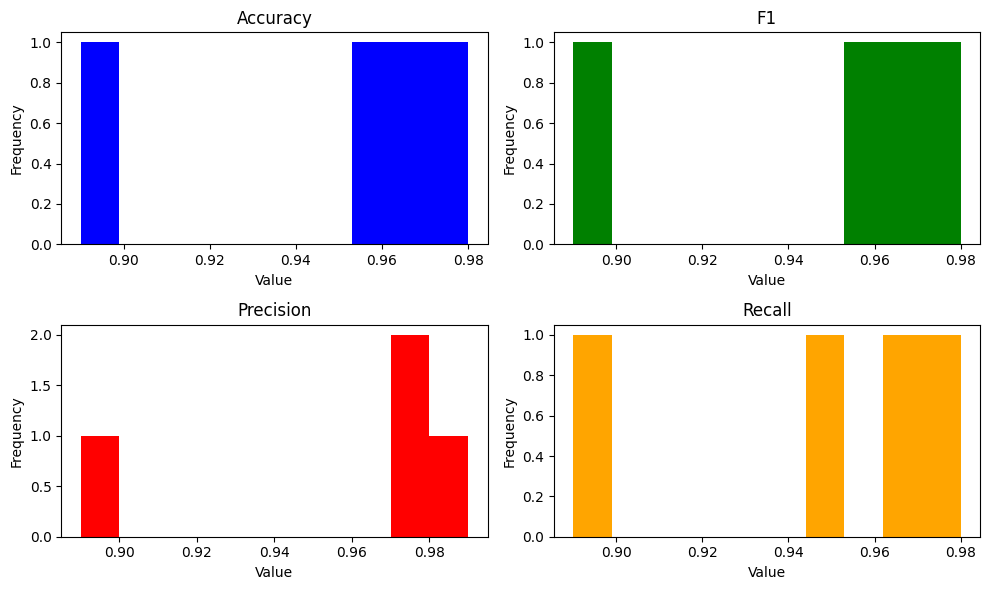

In [2]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN']
accuracy = [0.98, 0.97, 0.89, 0.96]
f1 = [0.98, 0.97, 0.89, 0.96]
precision = [0.99, 0.97, 0.89, 0.97]
recall = [0.98, 0.97, 0.89, 0.95]

# Plotting
plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(2, 2, 1)
plt.hist(accuracy, bins=10, color='blue')
plt.title('Accuracy')
plt.xlabel('Value')
plt.ylabel('Frequency')

# F1
plt.subplot(2, 2, 2)
plt.hist(f1, bins=10, color='green')
plt.title('F1')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Precision
plt.subplot(2, 2, 3)
plt.hist(precision, bins=10, color='red')
plt.title('Precision')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Recall
plt.subplot(2, 2, 4)
plt.hist(recall, bins=10, color='orange')
plt.title('Recall')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()


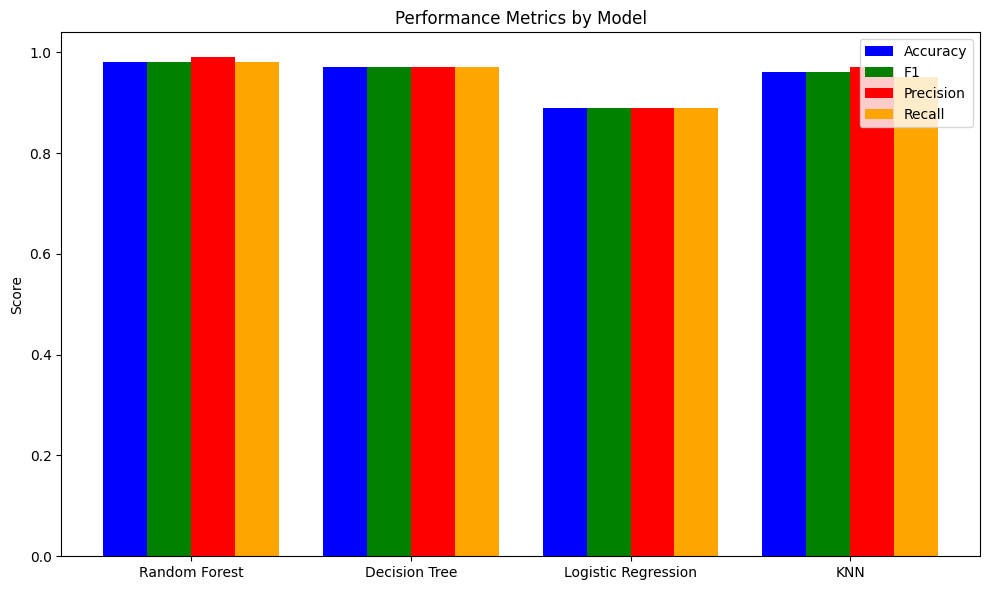

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN']
accuracy = [0.98, 0.97, 0.89, 0.96]
f1 = [0.98, 0.97, 0.89, 0.96]
precision = [0.99, 0.97, 0.89, 0.97]
recall = [0.98, 0.97, 0.89, 0.95]

# Set the x-axis values
x = np.arange(len(models))

# Set the width of the bars
width = 0.2

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Accuracy
ax.bar(x, accuracy, width, label='Accuracy', color='blue')
# F1
ax.bar(x + width, f1, width, label='F1', color='green')
# Precision
ax.bar(x + 2*width, precision, width, label='Precision', color='red')
# Recall
ax.bar(x + 3*width, recall, width, label='Recall', color='orange')

# Set the x-axis ticks and labels
ax.set_xticks(x + 1.5*width)
ax.set_xticklabels(models)

# Set the y-axis label
ax.set_ylabel('Score')

# Set the title and legend
ax.set_title('Performance Metrics by Model')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


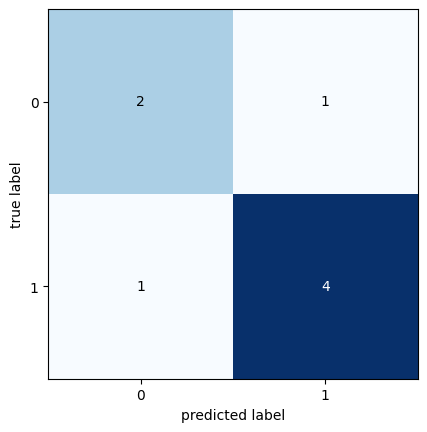

In [5]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array([[2, 1],
                    [1, 4]])

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

In [2]:
df = pd.read_csv("Phishing.csv")

In [3]:
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,2,12,5.5,8,4.083334,2,15,7,0,...,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
1,0,3,12,5.0,10,3.583333,3,12,8,2,...,1,0,-1,0.715629,0.776796,0.693127,0.738315,1.00000,-1.000000,benign
2,2,2,11,4.0,5,4.750000,2,16,11,0,...,2,0,1,0.677701,1.000000,0.677704,0.916667,0.00000,0.898227,benign
3,0,2,7,4.5,7,5.714286,2,15,10,0,...,0,0,-1,0.696067,0.879588,0.818007,0.753585,0.00000,-1.000000,benign
4,19,2,10,6.0,9,2.250000,2,9,5,0,...,5,4,3,0.747202,0.833700,0.655459,0.829535,0.83615,0.823008,benign


In [4]:
df_small = df[['Querylength', "domain_token_count", "URL_Type_obf_Type"]].sample(len(df))

In [5]:
df_small["URL_Type_obf_Type"] = df_small.URL_Type_obf_Type.replace({"benign":0, "phishing":1})

In [6]:
X = df_small.drop("URL_Type_obf_Type", axis=1)
y = df_small.URL_Type_obf_Type

In [7]:
X

,Querylength,domain_token_count
9587,0,14
2241,0,2
13694,0,3
9887,0,4
13487,0,3
...,...,...
5144,16,2
13120,0,4
8153,0,3
13392,0,3


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=23)

In [9]:
l = LogisticRegression()
l.fit(X_train, y_train)

LogisticRegression()

In [10]:
df_small.URL_Type_obf_Type.value_counts(normalize=True)

URL_Type_obf_Type
0    0.506345
1    0.493655
Name: proportion, dtype: float64

In [11]:
accuracy_score(y_test, l.predict(X_test)), accuracy_score(y_train, l.predict(X_train))

(0.8210800260247235, 0.8117627918327504)

In [12]:
f1_score(y_test, l.predict(X_test)), f1_score(y_train, l.predict(X_train))

(0.7965976331360946, 0.7875894988066825)

In [13]:
roc_auc_score(y_test, l.predict_proba(X_test)[:,1]), roc_auc_score(y_train, l.predict_proba(X_train)[:,1])

(0.8398865282584697, 0.8332202732681852)

In [14]:
confusion_matrix(y_test, l.predict(X_test))

array([[1447,  120],
       [ 430, 1077]])

In [15]:
import pickle
pickle.dump(l, open("model_small.pkl", "wb"))

In [90]:
# Write a function to extract from a url:

from urllib.parse import urlparse, parse_qs

def extract_features(url):
    parsed_url = urlparse(url)

    # Extract query params
    query_length = len(parse_qs(parsed_url.query))

    # Extract domain
    domain_tokens = parsed_url.netloc.split(".")
    domain_token_count = len(domain_tokens)

    return [query_length, domain_token_count]

In [91]:
results = extract_features("http://www.cultivateyourlife.com/data/santander.co.uk/retail.php?http://www.santander.co.uk/csgs/Satellite?appID=abbey.internet.Abbeycom&amp")

In [92]:
results_df = pd.DataFrame([results], columns=["Querylength", "domain_token_count"])

In [93]:
new_pred = l.predict(results_df)

In [94]:
new_pred

array([1])

In [95]:
result_2 = extract_features("https://www.google.com/search?q=hello+world&amp")

In [96]:
result_2_df = pd.DataFrame([result_2], columns=["Querylength", "domain_token_count"])

In [97]:
new_pred_2 = l.predict(result_2_df)

In [98]:
new_pred_2

array([1])

In [165]:
phishing_df = pd.read_csv("phishing_dataset.csv")

In [178]:
phishing_df.to_csv('new_phishing.csv')

In [185]:
phishing_df = phishing_df.rename(columns={phishing_df.columns[0]: 'URLs'})

In [193]:
phishing_df.to_csv('new_phishing.csv', index=False)

In [195]:
_df = pd.read_csv('new_phishing.csv') ; _df

,URLs
0,http://bid.openx.net/json?amp;amp;amp;amp;cid;...
1,http://webmail2.centurytel.net/hwebmail/servic...
2,http://www.google.com.ng/imgres?imgurl=http://...
3,http://webmail2.centurytel.net/hwebmail/servic...
4,http://www.liceonuzzi.it/cmd=_Inf/connectionSt...
...,...
9959,http://highedgesolar.com/nw/includes/
9960,http://jimfangimporters.yolasite.com/
9961,http://liuheng.chengxuren.com/Images/
9962,http://mcnaotempreco.net/site/portal/


In [172]:
def train_multiple(df: pd.DataFrame):

    input_df = df.copy()
    features = []
    for url in df["URLs"]:
        feature_extracted = extract_features(url)
        features.append(feature_extracted)

    new_df = pd.DataFrame(features, columns=["Querylength", "domain_token_count"])

    pred = l.predict(new_df)

    input_df["Prediction"] = pred

    return input_df

    

In [173]:
feature_extracted = train_multiple(phishing_df)

In [174]:
feature_extracted

,URLs,Prediction
0,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,1
1,http://webmail2.centurytel.net/hwebmail/servic...,1
2,http://www.google.com.ng/imgres?imgurl=http://...,1
3,http://webmail2.centurytel.net/hwebmail/servic...,1
4,http://www.liceonuzzi.it/cmd=_Inf/connectionSt...,1
...,...,...
9959,http://highedgesolar.com/nw/includes/,0
9960,http://jimfangimporters.yolasite.com/,1
9961,http://liuheng.chengxuren.com/Images/,1
9962,http://mcnaotempreco.net/site/portal/,0


In [175]:
feature_extracted.Prediction.value_counts()

Prediction
1    7594
0    2370
Name: count, dtype: int64

In [176]:
phishing_df

,URLs
0,http://bid.openx.net/json?amp;amp;amp;amp;cid;...
1,http://webmail2.centurytel.net/hwebmail/servic...
2,http://www.google.com.ng/imgres?imgurl=http://...
3,http://webmail2.centurytel.net/hwebmail/servic...
4,http://www.liceonuzzi.it/cmd=_Inf/connectionSt...
...,...
9959,http://highedgesolar.com/nw/includes/
9960,http://jimfangimporters.yolasite.com/
9961,http://liuheng.chengxuren.com/Images/
9962,http://mcnaotempreco.net/site/portal/


In [183]:
df = pd.read_csv("Phishing.csv")
# col_length = True if df.shape[1] == 1 else False
if not df.shape[1] == 1:
    print("CSV has more than one column")

CSV has more than one column


In [184]:
import streamlit as st

uploaded_file = st.sidebar.file_uploader('Upload your CSV file here.', type=['csv'])




2023-06-16 15:42:11.271 
  command:

    streamlit run /home/mubarak/Phishing/env/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


NoneType

In [152]:
result_2_df = pd.DataFrame(feature_extracted, columns=["Querylength", "domain_token_count"])

In [153]:
result_2_df

,Querylength,domain_token_count
0,6,3
1,1,3
2,4,4
3,1,3
4,2,3
...,...,...
9959,0,2
9960,0,3
9961,0,3
9962,0,2


In [ ]:
#Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
sfs = SequentialFeatureSelector(LogisticRegression(),
                                k_features="best",
                                forward=True,
                                scoring='accuracy',
                                cv=5,
                                )
selected_features = sfs.fit(X, y)

/home/mubarak/Phishing/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mubarak/Phishing/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [ ]:
selected_features

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(1, 2),
                          scoring='accuracy')